In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.datasets
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, classification_report

#### Reading Variable into the Environment

In [563]:
df = pd.read_csv("Breast Cancer datasets.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.0,0.14,0.21,0.40,0.16,0.24,0.08


In [564]:
#MISSING VALUE
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [565]:
#Checking for Duplicate Value
df.duplicated().sum()

0

In [566]:
#Checking for the shape of Datasets
df.shape

(569, 32)

In [567]:
#Dropping the id column
df1 = df.drop(columns=['id'])

In [568]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127381,19.289649,91.969033,654.889104,0.096239,0.104464,0.088840,0.048981,0.181125,0.062953,...,16.269209,25.677223,107.261213,880.583128,0.132197,0.254253,0.272250,0.114745,0.290316,0.083989
std,3.523928,4.301036,24.298981,351.914129,0.014496,0.052989,0.079806,0.038975,0.027504,0.007463,...,4.833217,6.146258,33.602542,569.356993,0.023292,0.157357,0.208666,0.065767,0.062011,0.018185
min,6.980000,9.710000,43.790000,143.500000,0.050000,0.020000,0.000000,0.000000,0.110000,0.050000,...,7.930000,12.020000,50.410000,185.200000,0.070000,0.030000,0.000000,0.000000,0.160000,0.060000
25%,11.700000,16.170000,75.170000,420.300000,0.090000,0.060000,0.030000,0.020000,0.160000,0.060000,...,13.010000,21.080000,84.110000,515.300000,0.120000,0.150000,0.110000,0.060000,0.250000,0.070000
50%,13.370000,18.840000,86.240000,551.100000,0.100000,0.090000,0.060000,0.030000,0.180000,0.060000,...,14.970000,25.410000,97.660000,686.500000,0.130000,0.210000,0.230000,0.100000,0.280000,0.080000
75%,15.780000,21.800000,104.100000,782.700000,0.110000,0.130000,0.130000,0.070000,0.200000,0.070000,...,18.790000,29.720000,125.400000,1084.000000,0.150000,0.340000,0.380000,0.160000,0.320000,0.090000
max,28.110000,39.280000,188.500000,2501.000000,0.160000,0.350000,0.430000,0.200000,0.300000,0.100000,...,36.040000,49.540000,251.200000,4254.000000,0.220000,1.060000,1.250000,0.290000,0.660000,0.210000


In [569]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#splitting dataset into dependent and independent variables

In [570]:
y = df1["diagnosis"]
x = df1.drop(columns=["diagnosis"])

In [571]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [572]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.0,0.14,0.21,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,0.17,0.06,...,25.45,26.40,166.10,2027.0,0.14,0.21,0.41,0.22,0.21,0.07
565,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,0.18,0.06,...,23.69,38.25,155.00,1731.0,0.12,0.19,0.32,0.16,0.26,0.07
566,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,0.16,0.06,...,18.98,34.12,126.70,1124.0,0.11,0.31,0.34,0.14,0.22,0.08
567,20.60,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,0.24,0.07,...,25.74,39.42,184.60,1821.0,0.17,0.87,0.94,0.27,0.41,0.12


In [573]:
df1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#normalizing data using the Standard scaler

In [574]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[ 1.09707601, -2.07333501,  1.26993369, ...,  2.36274807,
         2.73877027,  1.98192509],
       [ 1.82985767, -0.35363241,  1.68595471, ...,  1.14526683,
        -0.16651042,  0.33080448],
       [ 1.57991664,  0.45618695,  1.56650313, ...,  1.9061926 ,
         1.12472544,  0.33080448],
       ...,
       [ 0.70228279,  2.0455738 ,  0.67267578, ...,  0.38434107,
        -1.13493732, -0.21956906],
       [ 1.83837839,  2.33645719,  1.98252415, ...,  2.36274807,
         1.93174785,  1.98192509],
       [-1.80848849,  1.22179204, -1.81438851, ..., -1.74625109,
        -0.00510594, -0.76994259]])

In [575]:
dft = pd.DataFrame(scaler.fit_transform(x))

In [576]:
#using the principal component analysis to check for important features
pca = PCA(n_components=20)
pca.fit_transform(dft)

array([[ 9.3918    ,  2.59803013, -0.52155518, ...,  0.18129094,
        -0.13169716, -0.352852  ],
       [ 2.31734222, -3.70895594, -0.93855512, ..., -0.42197201,
        -0.2368821 ,  0.08042208],
       [ 5.65333346, -1.05129224, -0.67731896, ..., -0.63402055,
         0.14843119,  0.26362513],
       ...,
       [ 1.31537455, -1.73386011,  0.85146131, ...,  0.02136223,
        -0.14954414,  0.12375359],
       [10.53227289,  2.28837402, -1.25985993, ...,  0.89007872,
         0.16115795, -0.10089892],
       [-5.45268476, -0.74322221,  1.66946039, ..., -0.30963585,
        -0.03257   , -0.48748382]])

In [577]:
pd.DataFrame(pca.fit_transform(dft))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9.391800,2.598030,-0.521555,3.814745,-0.877297,0.722990,1.409105,1.238888,0.050147,0.128857,-0.036354,-1.159041,0.487855,0.582699,-0.820690,-0.203381,1.276385,0.181291,-0.131697,-0.352852
1,2.317342,-3.708956,-0.938555,0.960589,0.414226,-0.405168,-0.260265,0.892355,-1.058194,-0.317163,0.174133,-0.355485,-0.052884,1.757607,0.151279,0.252736,-0.616962,-0.421972,-0.236882,0.080422
2,5.653333,-1.051292,-0.677319,0.886084,-0.375704,0.260798,-1.065451,-0.109747,0.088196,-0.334272,-0.436623,-0.381860,-0.472035,-0.078798,-0.078399,0.365111,-0.076537,-0.634021,0.148431,0.263625
3,6.849708,10.365552,-2.561970,0.304741,-2.648371,2.828559,0.941820,1.049791,0.262283,1.262092,-2.190643,0.291051,0.490999,0.831985,-0.230464,-0.061660,0.171174,-0.401724,0.368676,-0.147765
4,4.085464,-1.693976,1.102412,2.901302,1.068905,-0.964843,-0.139277,-0.166515,-1.082833,-0.583446,0.271105,0.907896,0.684359,0.429022,-0.776071,-0.076214,-0.312361,0.447458,0.302498,-0.131616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.266884,-3.884663,1.610823,1.070954,-0.213318,-2.164690,0.047615,-0.577971,0.822121,-0.115929,0.302713,0.250318,-0.565177,0.079829,-0.263234,0.048478,0.009630,-0.613007,0.215886,0.376785
565,4.003565,-3.066507,2.204976,-2.286609,-1.007682,-0.540923,-0.345539,-1.184915,-0.166791,0.032852,-0.071361,-0.090915,-0.167789,0.940519,0.053745,0.536604,-0.049754,0.016983,0.044065,0.235692
566,1.315375,-1.733860,0.851461,-2.136535,1.860956,-0.770614,-0.834370,0.316607,0.563218,-0.547003,-0.743066,-0.296071,-0.951086,0.136967,0.314248,0.188774,-0.245893,0.021362,-0.149544,0.123754
567,10.532273,2.288374,-1.259860,-2.281803,0.165190,0.130751,0.054679,0.089244,-0.839984,-0.358331,0.214865,-0.504937,-0.341048,-0.633140,-0.481950,0.077972,0.454875,0.890079,0.161158,-0.100899


In [ ]:
#From our PCA decomposition it shows that the most important variable for classification are as shown in the above graph

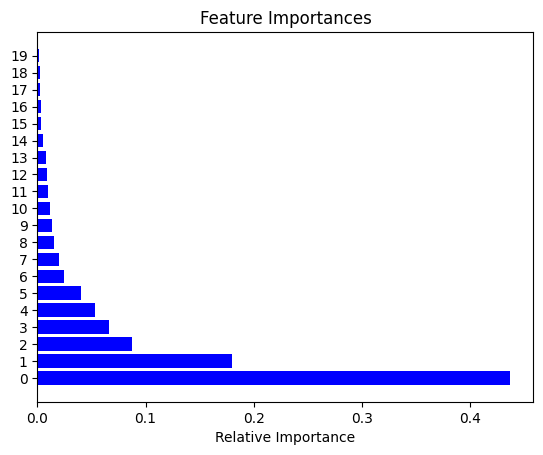

In [600]:
features = dft.columns
importances = pca.explained_variance_ratio_
indices = np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices[::-1])), importances[indices[::-1]], color='b', align='center')
plt.yticks(range(len(indices[::-1])), [features[i] for i in indices[::-1]])
plt.xlabel('Relative Importance')
plt.show()

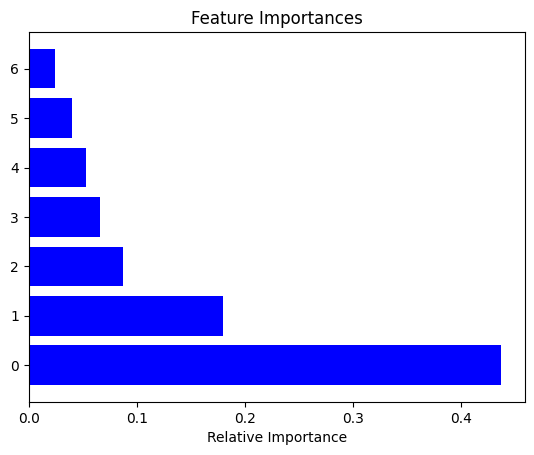

In [608]:
features = dft.columns
importances = pca.explained_variance_ratio_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.barh(range(len(indices[:7])), importances[indices[:7]], color='b', align='center')
plt.yticks(range(len(indices[:7])), [features[i] for i in indices[:7]])
plt.xlabel('Relative Importance')
plt.show()

#### splitting dataset into test and train

In [579]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

In [770]:
print('shape of training set: ',X_train.shape)
print('shape of test set: ',X_test.shape)

shape of training set:  (455, 30)
shape of test set:  (114, 30)


#### Checking for Performances of our model using different model

In [700]:
clf = neighbors.KNeighborsClassifier()

In [702]:
clf.fit(X_train, y_train)

In [712]:
y_pred = clf.predict(X_test)

In [713]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 95.6140350877193


In [719]:
y_pred = model.predict(X_test)

In [722]:
cm = confusion_matrix(y_test, y_pred)

In [737]:
print(cm)

[[70  1]
 [ 4 39]]


In [738]:
accuracy = (TP + TN) / (TP + FP + TN + FN)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [728]:
y_pred = model.predict(X_test)

In [739]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.98591549 0.90697674]


#### printing the precision,recall,and f1-score to determine how well the model has classified the dataset.

In [768]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [769]:
print("ac_score : ",accuracy_score(y_test, y_predict))

ac_score :  0.956140350877193


In [775]:
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [777]:
tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=20, cv=5)

In [778]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000297111F2CB0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000297134F3E50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000297134F37F0>})

In [779]:
print("Best hyperparameters: ", random_search.best_params_)
print("Test accuracy: ", random_search.best_estimator_.score(X_test, y_test))

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 6}
Test accuracy:  0.956140350877193
